In [ ]:

import kagglehub
ramoliyafenil_text_based_cyber_threat_detection_path = kagglehub.dataset_download('ramoliyafenil/text-based-cyber-threat-detection')

print('Data source import complete.')


100%|██████████| 3.91M/3.91M [00:00<00:00, 42.5MB/s]

Extracting files...


Data source import complete.


In [ ]:
ramoliyafenil_text_based_cyber_threat_detection_path

'/root/.cache/kagglehub/datasets/ramoliyafenil/text-based-cyber-threat-detection/versions/1'

In [ ]:
# prompt: save the dataset to gdrive

import shutil
import os

# Assuming ramoliyafenil_text_based_cyber_threat_detection_path is defined
# from the previous code cell and contains the path to the downloaded dataset

# Define the destination path in Google Drive
destination_path = '/content/drive/My Drive/cyber_threat_detection_dataset'

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Copy the dataset to Google Drive
try:
    shutil.copytree(ramoliyafenil_text_based_cyber_threat_detection_path, destination_path, dirs_exist_ok=True)
    print(f"Dataset successfully copied to: {destination_path}")
except Exception as e:
    print(f"An error occurred: {e}")

# Verify the copy
!ls -l '/content/drive/My Drive/cyber_threat_detection_dataset'

Dataset successfully copied to: /content/drive/My Drive/cyber_threat_detection_dataset
total 14056
-rw-r--r-- 1 root root 2843500 Jan 28 02:38 all.jsonl
-rw-r--r-- 1 root root 5418580 Jan 28 02:38 cyber-threat-intelligence_all.csv
-rw-r--r-- 1 root root  577370 Jan 28 02:38 Cyber-Threat-Intelligence-Custom-Data_new_processed.csv
-rw-r--r-- 1 root root  395580 Jan 28 02:38 cyber-threat-intelligence-splited_test.csv
-rw-r--r-- 1 root root 1884514 Jan 28 02:38 cyber-threat-intelligence-splited_train.csv
-rw-r--r-- 1 root root  405077 Jan 28 02:38 cyber-threat-intelligence-splited_validate.csv
-rw-r--r-- 1 root root  421219 Jan 28 02:38 test.jsonl
-rw-r--r-- 1 root root 1999787 Jan 28 02:38 train.jsonl
-rw-r--r-- 1 root root  432552 Jan 28 02:38 validation.jsonl


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.metrics import confusion_matrix
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk

In [ ]:
df = pd.read_csv(ramoliyafenil_text_based_cyber_threat_detection_path+'/cyber-threat-intelligence_all.csv')

In [ ]:
df.head()

,Unnamed: 0,index,text,entities,relations,Comments,id,label,start_offset,end_offset
0,0,1.0,This post is also available in: 日本語 (Japa...,"[{'id': 45800, 'label': 'malware', 'start_offs...",[],[],45800.0,malware,288.0,300.0
1,1,2.0,The attack vector is very basic and repeats it...,"[{'id': 48941, 'label': 'attack-pattern', 'sta...",[],[],48941.0,attack-pattern,69.0,115.0
2,2,3.0,Once executed by the user the first stage malw...,[],[],[],NaN,NaN,NaN,NaN
3,3,4.0,The first known campaign was launched by Crim...,"[{'id': 45806, 'label': 'TIME', 'start_offset'...",[],[],45806.0,TIME,55.0,68.0
4,4,5.0,The first stage downloaded the ransomware from...,[],[],[],NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19940 entries, 0 to 19939
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    19940 non-null  int64  
 1   index         19464 non-null  float64
 2   text          19940 non-null  object 
 3   entities      19464 non-null  object 
 4   relations     19464 non-null  object 
 5   Comments      19464 non-null  object 
 6   id            9462 non-null   float64
 7   label         9938 non-null   object 
 8   start_offset  9462 non-null   float64
 9   end_offset    9462 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [ ]:
df=df.drop(labels='Unnamed: 0',axis=1)

In [ ]:
df['label'].fillna(value='benign', inplace=True)

<ipython-input-10-de5cfd275a5e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['label'].fillna(value='benign', inplace=True)


In [ ]:
df=df.fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19940 entries, 0 to 19939
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         19940 non-null  float64
 1   text          19940 non-null  object 
 2   entities      19940 non-null  object 
 3   relations     19940 non-null  object 
 4   Comments      19940 non-null  object 
 5   id            19940 non-null  float64
 6   label         19940 non-null  object 
 7   start_offset  19940 non-null  float64
 8   end_offset    19940 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.4+ MB


In [ ]:
df['label'].unique()

array(['malware', 'attack-pattern', 'benign', 'TIME', 'identity',
       'SOFTWARE', 'threat-actor', 'location', 'tools', 'FILEPATH',
       'SHA2', 'vulnerability', 'URL', 'DOMAIN', 'IPV4', 'campaign',
       'EMAIL', 'REGISTRYKEY', 'SHA1', 'Infrastucture', 'MD5', 'url',
       'hash'], dtype=object)

In [ ]:
data = df[['text','label']]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text)

    tokens = [token.lower() for token in tokens if token not in punctuations]

    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    tokens = [token for token in tokens if token not in stop_words]

    processed_text = ' '.join(tokens)

    return processed_text

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
data['text_new'] = data['text'].apply(preprocess_text)

<ipython-input-23-dc3264fa6aec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_new'] = data['text'].apply(preprocess_text)


In [ ]:
data = data.drop(labels=['text'],axis=1)

In [ ]:
data['text_new'] = data['text_new'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

In [ ]:
data.head()

,label,text_new
0,malware,post also available japanese ctblocker wellkn...
1,attack-pattern,attack vector basic repeat begin spear phishin...
2,benign,executed user first stage malware downloads ex...
3,TIME,first known campaign wa launched crimeware nov...
4,benign,first stage downloaded ransomware site


In [ ]:
data.shape

(19940, 2)

In [ ]:
data.label.loc[(data['label']=="MD5") | (data['label']=="REGISTRYKEY") | (data['label']=="EMAIL") |  (data['label']=="Infrastucture") | (data['label']=="DOMAIN") | (data['label']=="SHA1") | (data['label']=="IPV4") | (data['label']=="campaign") | (data['label']=="URL") | (data['label']=="SHA2") | (data['label']=="vulnerability") | (data['label']=="FILEPATH") | (data['label']=="tools") | (data['label']=="TIME") | (data['label']=="url") | (data['label']=="hash") ] = "NEED_ATTENTION"

<ipython-input-28-43e5f46344e0>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.label.loc[(data['label']=="MD5") | (data['label']=="REGISTRYKEY") | (data['label']=="EMAIL") |  (data['label']=="Infrastucture") | (data['label']=="DOMAIN"

In [ ]:
data['label'].value_counts()

,count
label,
benign,10002
NEED_ATTENTION,2132
malware,1911
location,1405
SOFTWARE,1229
attack-pattern,1206
identity,1165
threat-actor,890


In [ ]:
data.label.value_counts()

,count
label,
benign,10002
NEED_ATTENTION,2132
malware,1911
location,1405
SOFTWARE,1229
attack-pattern,1206
identity,1165
threat-actor,890


In [ ]:
data['text_new'][0]

'post also available  japanese ctblocker wellknown ransomware trojan used crimeware group encrypt file victim s endpoint demand ransom payment decrypt file back original state antiviruses detect mistake cryptolocker one vendor correctly detects ctblocker'

In [ ]:
max_length = data['text_new'].str.len().max()
max_length

4655

In [ ]:
max_length_tokens = data['text_new'].apply(lambda x: len(x.split())).max()

In [ ]:
max_length_characters = data['text_new'].apply(lambda x: len(x)).max()

print('Maximum Sequence Length (Tokens):', max_length_tokens)
print('Maximum Sequence Length (Characters):', max_length_characters)

Maximum Sequence Length (Tokens): 451
Maximum Sequence Length (Characters): 4655


In [ ]:
MAX_NB_WORDS = 50000
MAX_SEQ_LENGTH = 450
EMBEDDING_DIM=100

In [ ]:
data = data.rename(columns={'text_new': 'text'})

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%()*+,-./:;<=>?@[\]^_`{|}',lower=True)
tokenizer.fit_on_texts(data['text'].values)

In [ ]:
word_index = tokenizer.word_index
len(word_index)

11941

In [ ]:
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X,maxlen=MAX_SEQ_LENGTH)

In [ ]:
X

array([[   0,    0,    0, ..., 1943, 1717, 4839],
       [   0,    0,    0, ...,  342, 1916, 6563],
       [   0,    0,    0, ...,  533,   18,  181],
       ...,
       [   0,    0,    0, ...,  257,    2,   18],
       [   0,    0,    0, ..., 1375, 1828, 2239],
       [   0,    0,    0, ...,   16,   26,   39]], dtype=int32)

In [ ]:
X.shape

(19940, 450)

In [ ]:
Y = pd.get_dummies(data['label']).values

In [ ]:
from sklearn.preprocessing import LabelBinarizer
# Perform one-hot encoding using LabelBinarizer
lb = LabelBinarizer()
Y = lb.fit_transform(data['label'])

In [ ]:
Y

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
Y.shape

(19940, 8)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [ ]:
model=Sequential()
model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=X.shape[1]))
model.add(LSTM(150,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(8,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.save_weights("adaptivecyber.weights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
epochs=10
batch_size=64
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.5066 - loss: 1.5664 - val_accuracy: 0.5873 - val_loss: 1.2321
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.6530 - loss: 1.0334 - val_accuracy: 0.7324 - val_loss: 0.8697
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 314s 1s/step - accuracy: 0.8338 - loss: 0.5487 - val_accuracy: 0.7991 - val_loss: 0.7140
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.9104 - loss: 0.3118 - val_accuracy: 0.8317 - val_loss: 0.6692
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.9402 - loss: 0.2084 - val_accuracy: 0.8424 - val_loss: 0.6524
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.9505 - loss: 0.1678 - val_accuracy: 0.8483 - val_loss: 0.6805
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.9583 - loss: 0.1381 - val_accuracy: 0.8527 - val_loss: 0.7249
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.9601 - loss: 0.1232 - val_accu

In [ ]:
accr = model.evaluate(x_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 259ms/step - accuracy: 0.8516 - loss: 0.7190
Test set
  Loss: 0.711
  Accuracy: 0.853


In [ ]:
predictions = model.predict(x_test)
for i in range(5):
    print('Prediction: {}'.format(predictions[i]))
    print('Actual: {}'.format(y_test[i]))

125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 283ms/step
Prediction: [9.9561524e-01 1.4047916e-07 9.7498514e-08 7.0438100e-10 8.2367059e-08
 1.4841838e-06 4.3828650e-03 2.4502829e-09]
Actual: [1 0 0 0 0 0 0 0]
Prediction: [2.0554842e-06 8.3164110e-08 4.6360778e-08 9.9997157e-01 2.7269332e-08
 5.4985840e-08 2.6143343e-05 5.6605572e-08]
Actual: [0 0 0 1 0 0 0 0]
Prediction: [6.1786303e-04 1.9152141e-05 2.5426969e-05 5.5348529e-03 1.8430190e-05
 1.9850779e-02 9.7321439e-01 7.1912410e-04]
Actual: [0 0 0 0 0 0 1 0]
Prediction: [3.2027535e-06 7.5927225e-04 3.5712452e-07 9.9923456e-01 7.6793975e-07
 5.2757235e-07 1.1210591e-06 8.5707917e-08]
Actual: [0 1 0 0 0 0 0 0]
Prediction: [2.6411797e-06 1.3851857e-06 8.1749573e-07 9.9998957e-01 9.8400176e-07
 9.9422344e-08 3.8314652e-06 7.5969257e-07]
Actual: [0 0 0 1 0 0 0 0]


In [ ]:
import matplotlib.pyplot as plt

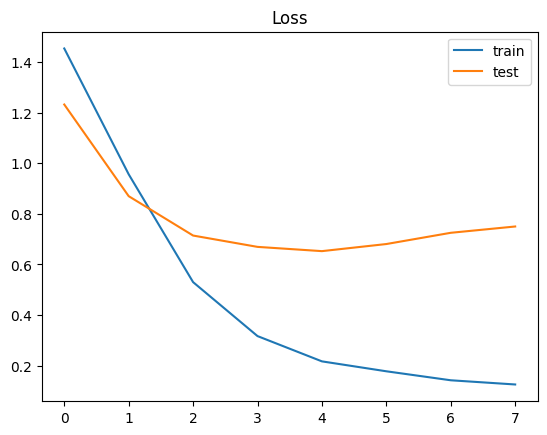

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 40s 324ms/step


In [ ]:
class_labels = lb.classes_

print(class_labels)

['NEED_ATTENTION' 'SOFTWARE' 'attack-pattern' 'benign' 'identity'
 'location' 'malware' 'threat-actor']


125/125 ━━━━━━━━━━━━━━━━━━━━ 39s 314ms/step


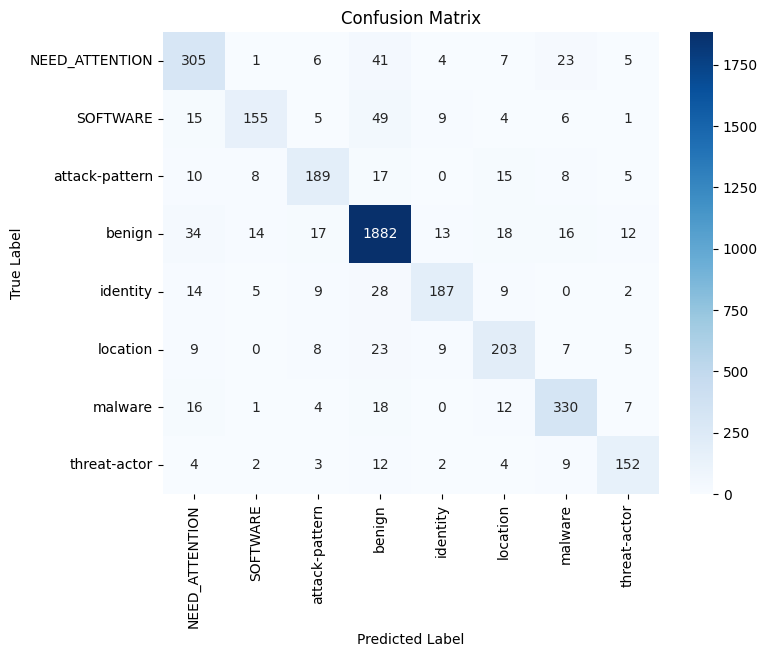

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

cm = confusion_matrix(y_true, y_pred)

classes = np.arange(len(cm))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print('hi')

hi


In [ ]:
accuracy = (cm.diagonal().sum()) / cm.sum()
accuracy

0.8533099297893681

In [ ]:
precision = cm.diagonal() / cm.sum(axis=0)
precision

array([0.74938575, 0.83333333, 0.78423237, 0.90917874, 0.83482143,
       0.74632353, 0.82706767, 0.8042328 ])

In [ ]:
recall = cm.diagonal() / cm.sum(axis=1)
recall

array([0.77806122, 0.6352459 , 0.75      , 0.93818544, 0.73622047,
       0.76893939, 0.85051546, 0.80851064])

In [ ]:
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

array([0.76345432, 0.72093023, 0.76673428, 0.92345437, 0.78242678,
       0.75746269, 0.8386277 , 0.80636605])

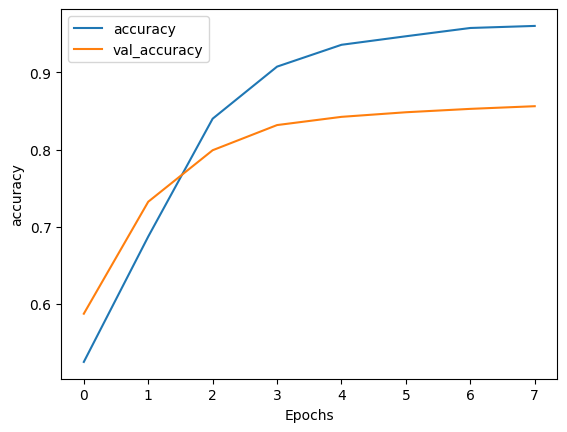

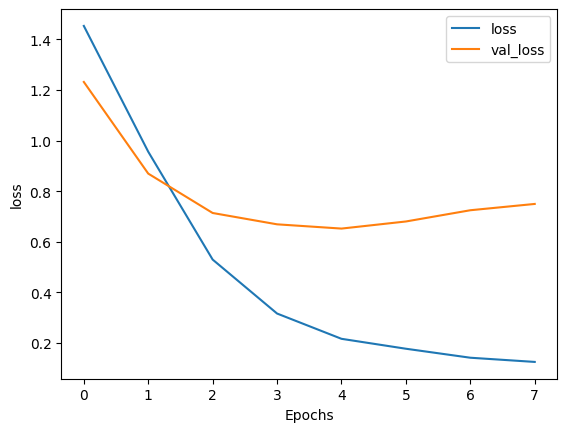

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import Embedding, LSTM, Dropout, Dense

# # Create the model
# model = Sequential()
# model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
# model.add(LSTM(150, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dropout(0.2))
# model.add(Dense(8, activation='softmax'))

# # Function to plot the model diagram
# def plot_model_diagram(model):
#     layer_names = [layer.__class__.__name__ for layer in model.layers]
#     output_shapes = [layer.output_shape[1:] for layer in model.layers]

#     plt.figure(figsize=(5, 5))
#     plt.title("Model Diagram")
#     plt.xlabel("Layers")
#     plt.ylabel("Output Shapes")

#     for i, (layer_name, output_shape) in enumerate(zip(layer_names, output_shapes)):
#         output_shape_str = str(output_shape).replace(",", "x").replace("(", "").replace(")", "")

#         plt.text(0.5, i, f"{layer_name}\n{output_shape_str}",
#                  horizontalalignment='center',
#                  verticalalignment='center',
#                  bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

#     plt.yticks(range(len(layer_names)), layer_names)
#     plt.xticks([])
#     plt.ylim(len(layer_names) - 0.5, -0.5)  # Reverse y-axis
#     plt.tight_layout()
#     plt.show()

# # Generate the model diagram
# plot_model_diagram(model)


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

# Save the model architecture and weights to Google Drive
model.save('/content/drive/My Drive/cyber_threat_detection_model.h5')
print("Saved model to Google Drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved model to Google Drive


# new fit

In [ ]:
model1=Sequential()
model1.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=X.shape[1]))
model1.add(LSTM(150,dropout=0.2,recurrent_dropout=0.2))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(8,activation='softmax'))

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model1.summary()

In [ ]:
epochs=15
batch_size=75
history = model1.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

In [ ]:
accr = model.evaluate(x_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
accuracy = (cm.diagonal().sum()) / cm.sum()
accuracy

In [ ]:
precision = cm.diagonal() / cm.sum(axis=0)
precision

In [ ]:
recall = cm.diagonal() / cm.sum(axis=1)
recall

In [ ]:
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

In [ ]:
class_labels = lb.classes_

print(class_labels)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

cm1 = confusion_matrix(y_true, y_pred)

classes = np.arange(len(cm))

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
y_pred.shape

In [ ]:
y_true.shape

In [ ]:
accuracy = (cm.diagonal().sum()) / cm.sum()
accuracy

In [ ]:
precision = cm.diagonal() / cm.sum(axis=0)
precision

In [ ]:
recall = cm.diagonal() / cm.sum(axis=1)
recall

In [ ]:
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

In [ ]:
class_labels = lb.classes_

print(class_labels)

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")